In [1]:
!pip install flask
!pip install gunicorn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Epoch 1/20


D:\Jupyter_Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4579 - loss: 1.2787 - val_accuracy: 0.4950 - val_loss: 1.2585
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5380 - loss: 1.2066 - val_accuracy: 0.4950 - val_loss: 1.2364
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5969 - loss: 1.1337 - val_accuracy: 0.4950 - val_loss: 1.2526
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5352 - loss: 1.1937 - val_accuracy: 0.4950 - val_loss: 1.2390
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5739 - loss: 1.1546 - val_accuracy: 0.4950 - val_loss: 1.2460
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5364 - loss: 1.1775 - val_accuracy: 0.4950 - val_loss: 1.2419
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5617 - loss: 1.1687 - val_accuracy: 0.4950 - val_loss: 1.2376
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5714 - loss: 1.1396 - val_accuracy: 0.4950 - val_loss: 1.2371
Epo

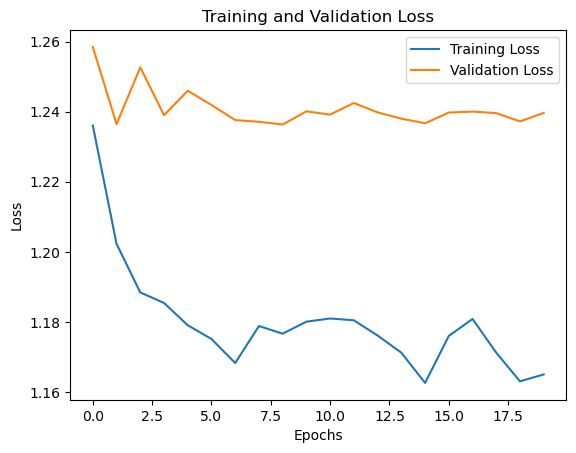

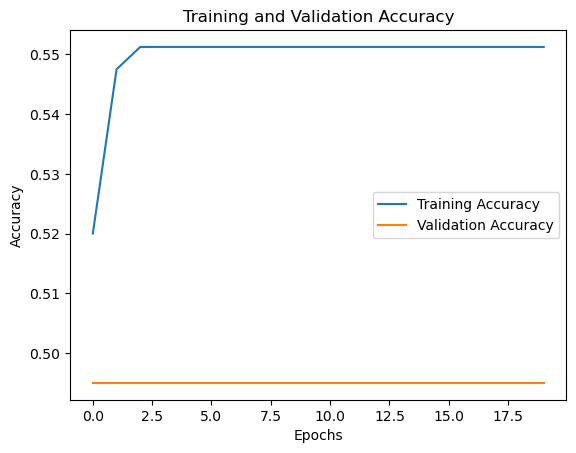

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5116 - loss: 1.2186 
Validation Loss: 1.2396
Validation Accuracy: 0.4950


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Tạo dữ liệu giả lập
labels_1 = ['A+', 'A', 'B+', 'C']
labels_2 = ['A+', 'A', 'B+', 'C']
np.random.seed(42)

# Môn 1
score_1 = np.random.choice([4, 3.5, 3, 2.5], size=500, p=[0.1, 0.1, 0.2, 0.6])
grade_1 = np.random.choice(labels_1, size=500, p=[0.1, 0.1, 0.2, 0.6])

# Môn 2
score_2 = np.random.choice([4, 3.5, 3, 2.5], size=500, p=[0.1, 0.2, 0.2, 0.5])
grade_2 = np.random.choice(labels_2, size=500, p=[0.1, 0.2, 0.2, 0.5])

# Tạo DataFrame
data = pd.DataFrame({
    'Môn 1': score_1.tolist() + score_2.tolist(),
    'Môn 2': score_2.tolist() + score_1.tolist(),
    'Phân loại môn 1': grade_1.tolist() + grade_2.tolist(),
    'Phân loại môn 2': grade_2.tolist() + grade_1.tolist()
})

# Mã hóa nhãn phân loại
label_map = {'A+': 0, 'A': 1, 'B+': 2, 'C': 3}
data['Phân loại môn 1'] = data['Phân loại môn 1'].map(label_map)
data['Phân loại môn 2'] = data['Phân loại môn 2'].map(label_map)

# Tạo dữ liệu đầu vào (features) và nhãn (labels)
X = data[['Môn 1', 'Môn 2']].values
y = to_categorical(data['Phân loại môn 1'].values, num_classes=4)

# Chia dữ liệu thành train và test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình 7-layer
model_7_layer = Sequential()
model_7_layer.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
model_7_layer.add(Dropout(0.2))

for _ in range(6):
    model_7_layer.add(Dense(100, activation='relu'))
    model_7_layer.add(Dropout(0.2))

model_7_layer.add(Dense(4, activation='softmax'))  # Output lớp phân loại 4 lớp A+, A, B+, C

# Compile mô hình
model_7_layer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history_7_layer = model_7_layer.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Lưu mô hình vào tệp student_model.h5
model_7_layer.save('student_model.h5')

# Vẽ đồ thị Loss
plt.plot(history_7_layer.history['loss'], label='Training Loss')
plt.plot(history_7_layer.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ đồ thị Accuracy
plt.plot(history_7_layer.history['accuracy'], label='Training Accuracy')
plt.plot(history_7_layer.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Đánh giá mô hình
val_loss, val_accuracy = model_7_layer.evaluate(X_test, y_test)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


In [ ]:
!pip install flask-ngrok

In [6]:
from flask import Flask, request, jsonify
import tensorflow as tf

# Tạo Flask app
app = Flask(__name__)

# Load mô hình đã huấn luyện
model_7_layer = tf.keras.models.load_model('student_model.h5')

@app.route('/predict', methods=['POST'])
def predict():
    # Lấy dữ liệu đầu vào từ request
    data = request.get_json()

    # Kiểm tra dữ liệu nhập vào có hợp lệ không
    if 'Môn 1' not in data or 'Môn 2' not in data:
        return jsonify({'error': 'Missing input data'}), 400

    # Chuyển đổi dữ liệu nhập vào thành array numpy
    input_data = np.array([[data['Môn 1'], data['Môn 2']]])

    # Dự đoán phân loại
    prediction = model_7_layer.predict(input_data)

    # Chuyển đổi dự đoán thành label (A+, A, B+, C)
    labels = ['A+', 'A', 'B+', 'C']
    predicted_label = labels[np.argmax(prediction)]

    return jsonify({'predicted_class': predicted_label, 'confidence': np.max(prediction)})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (windowsapi)


SystemExit: 1

D:\Jupyter_Anaconda\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
